In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
{sensor1:{date:[],sensorvalue:[]}}

In [ ]:
import os
for dirname, _, filenames in os.walk('C:/Users/rajyasri/Downloads/Sample_SensorVariation.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/content/Sample_SensorVariation.csv', index_col='Date', parse_dates=True)

In [ ]:
data.head()

,index,Actual,sin,Original,Sum,prediction,Noise,Rise_t,Drift,Rise
Date,,,,,,,,,,
2023-05-15,1,0,0.000000,0.000,0.000000,NaN,0.0081,0.0081,0.1,0.1081
2023-05-16,2,15,0.258819,0.002,0.260819,NaN,-0.0010,0.0010,0.1,0.1010
2023-05-17,3,30,0.500000,0.004,0.504000,NaN,0.0068,0.0108,0.1,0.1108
2023-05-18,4,45,0.707107,0.006,0.713107,NaN,-0.0027,0.0033,0.1,0.1033
2023-05-19,5,60,0.866025,0.008,0.874025,NaN,0.0060,0.0140,0.1,0.1140


In [ ]:
print(data.Rise)

Date
2023-05-15    0.1081
2023-05-16    0.1010
2023-05-17    0.1108
2023-05-18    0.1033
2023-05-19    0.1140
               ...  
2024-05-04    4.3099
2024-05-05    4.3052
2024-05-06    4.3042
2024-05-07    4.3258
2024-05-08    4.3129
Name: Rise, Length: 360, dtype: float64


<Axes: xlabel='Date'>

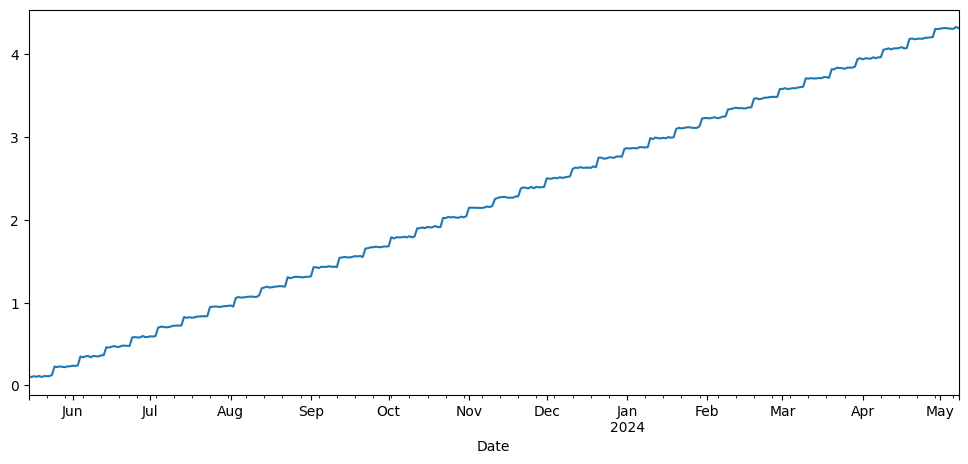

In [ ]:
data['Rise'].plot(figsize=(12,5))

In [ ]:
data=data.drop( ['index','Actual','sin','Original','Sum','Noise','Rise_t','Drift','prediction'], axis=1)
data.head()

,Rise
Date,
2023-05-15,0.1081
2023-05-16,0.1010
2023-05-17,0.1108
2023-05-18,0.1033
2023-05-19,0.1140


In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
     dftest = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(data['Rise'])

1. ADF :  0.08048861349588518
2. P-Value :  0.9647034351624151
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression: 350
5. Critical Values :
	 1% :  -3.4491725955218655
	 5% :  -2.8698334971428574
	 10% :  -2.5711883591836733


In [ ]:
print(data.shape)
train=data.iloc[:-30]
test=data.iloc[-30:]
print(train.shape,test.shape)

(360, 1)
(330, 1) (30, 1)


In [ ]:
start=len(train)
end=len(train)+len(test)-1
print(start)
print(end)

330
359


In [ ]:
!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Seasonal - fit stepwise auto-ARIMA
import pmdarima as pm
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=7,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.65 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=-1159.705, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-1360.896, Time=1.70 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=-654.401, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=-1269.794, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=-1510.175, Time=10.28 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=-1474.811, Time=10.03 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=7.40 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=-1511.124, Time=9.46 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=-1230.079, Time=2.57 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=11.29 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=3.71 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=-1536.334, Time=4.76 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=-1348

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  360
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 7)   Log Likelihood                 786.278
Date:                            Sat, 27 May 2023   AIC                          -1560.555
Time:                                    03:46:20   BIC                          -1537.356
Sample:                                05-15-2023   HQIC                         -1551.324
                                     - 05-08-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1137      0.027      4.279      0.000       0.062       0.166
ar.L1          0.5004      0.110      4.563      0.000       0.285       0.715
ma.L1         -0.8791      0.061    -14.463      0.000      -0.998      -0.760
ar.S.L7       -0.7929      0.059    -13.374      0.000      -0.909      -0.677
ar.S.L14      -0.9151      0.043    -21.212      0.000      -1.000      -0.831
sigma2         0.0006   4.26e-05     13.247      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               131.35
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             1.22
Prob(H) (two-sided):                  0.89   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#model=smodel.fit(train['Rise'])

2024-05-09     4.350996
2024-05-10     4.441711
2024-05-11     4.443212
2024-05-12     4.430921
2024-05-13     4.422212
                ...    
2025-09-16    10.320756
2025-09-17    10.316806
2025-09-18    10.335740
2025-09-19    10.367881
2025-09-20    10.368688
Freq: D, Length: 500, dtype: float64


<Axes: >

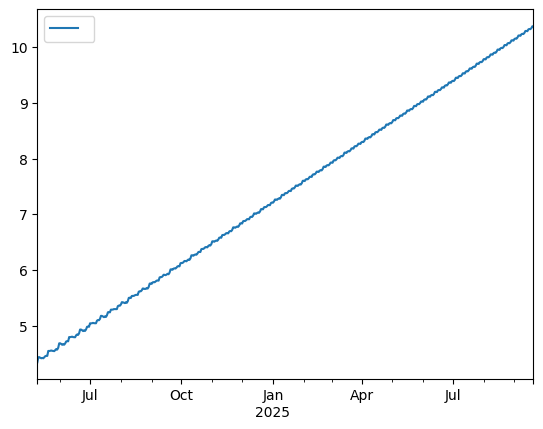

In [ ]:
pred=smodel.predict(n_periods=500)
print(pred)
pred.plot(legend=True)

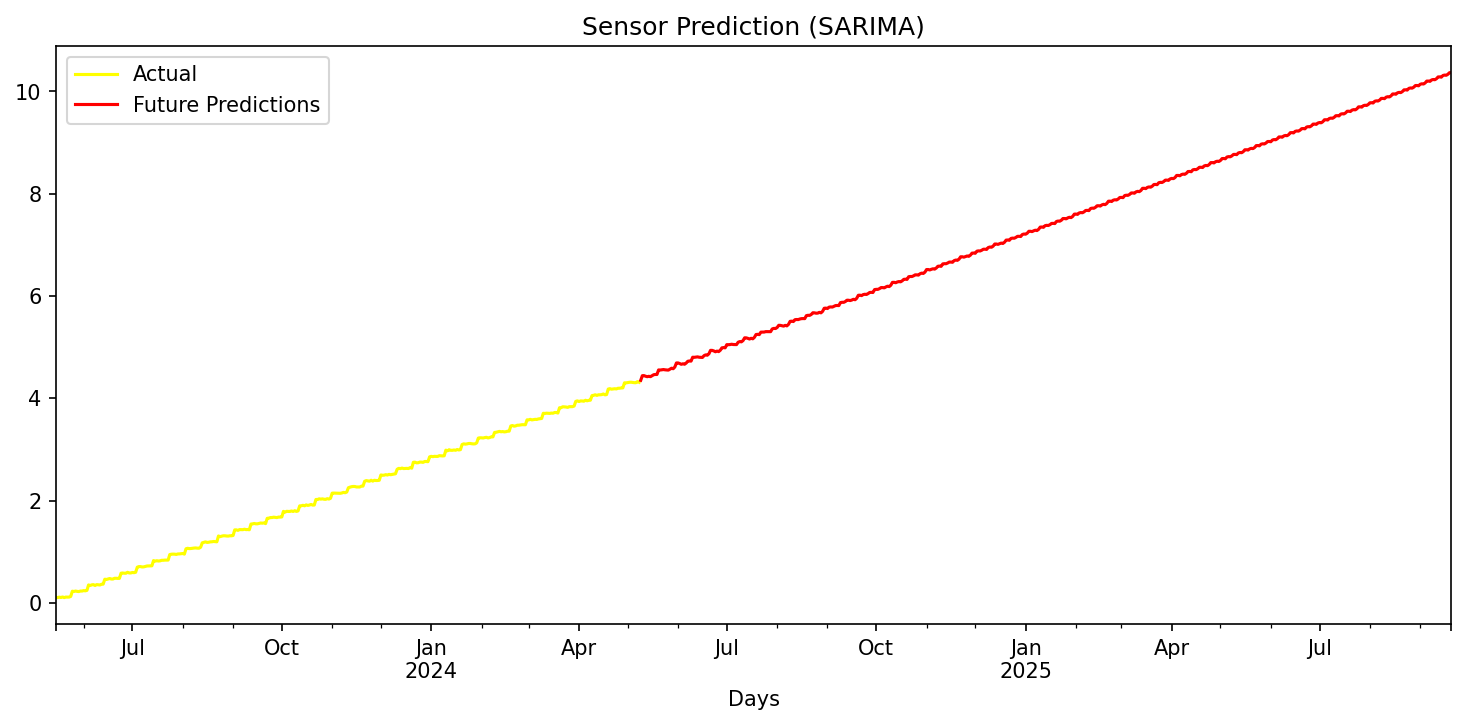

In [ ]:
plt.figure(figsize=(16, 3), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
ax=data['Rise'].plot(label='Actual', color='Yellow',figsize=(12, 5))
pred.plot(ax=ax,label='Future Predictions',color='Red',figsize=(12, 5))
  
# adding title to the plot
plt.title('Sensor Prediction (SARIMA)')
  
# adding Label to the x-axis
plt.xlabel('Days')
  
# adding legend to the curve
plt.legend()